## IBM PROFESSIONAL CERTIFICATION IN DATA SCIENCE CAPSTONE - PART 3: DECODING DUBLIN THROUGH DATA
## Irish Pub Exploration

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library


print('Libraries imported.')

In [30]:
CLIENT_ID = 'BJAKOBU2AS1ZQPMVLIE3JQRBOFQWPZONVEQLVS5RF4TXC4KG' # your Foursquare ID
CLIENT_SECRET = '2MUXVFOAOUIBESPYVU5S2N1SXXYKTZQDQQ431YLA1WICHO4K' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BJAKOBU2AS1ZQPMVLIE3JQRBOFQWPZONVEQLVS5RF4TXC4KG
CLIENT_SECRET:2MUXVFOAOUIBESPYVU5S2N1SXXYKTZQDQQ431YLA1WICHO4K


In [3]:
latitude = 53.366659
longitude = -6.237833

### Reading in the data after removing venues further than 10 Kms away, obtained from Part 1 of the analysis 

In [4]:
df_coords = pd.read_excel('DublinAreas10.xlsx')
df_coords = df_coords.reset_index(drop=True)
df_coords = df_coords.drop(['Unnamed: 0'], axis = 1)
df_coords

,Neighbourhood,Main Area,Latitude,Longitude,Distance
0,Dublin 1,Northside,53.352488,-6.256646,1.187067
1,Dublin 3,Northside,53.361223,-6.185467,4.032785
2,Dublin 5,Northside,53.383454,-6.181923,5.657058
3,Dublin 7,Northside,53.360551,-6.284470,3.236640
4,Dublin 9,Northside,53.386050,-6.245577,4.354886
5,Dublin 11,Northside,53.386614,-6.292627,5.569075
6,Dublin 17,Northside,53.400361,-6.209491,6.301820
7,Dublin 2,Southside,53.338940,-6.252713,1.169084
8,Dublin 4,Southside,53.327507,-6.227486,2.351192
9,Dublin 6,Southside,53.317698,-6.259525,3.471425


### Function to get data on pubs in each area

In [5]:
def GetPubData(latitude, longitude, search_query, radius):
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    print(url)
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe = json_normalize(venues)

    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

    return dataframe_filtered

In [42]:
#check for pubs
Check = 0
for index, row in df_coords.iterrows():
    x_df = GetPubData(latitude = row['Latitude'],longitude = row['Longitude'], search_query = "pub", radius = 3000)
    x_df['neighborhood'] = df_coords.at[index , 'Neighbourhood']
    if Check != 0:
        df_PubData = df_PubData.append(x_df, sort = 'False')
    else:
        df_PubData = x_df
        df_PubData['neighborhood'] = df_coords.at[index , 'Neighbourhood']
        Check = 1
df_Pubdata = df_PubData.reset_index(drop = True)
df_PubData.head()

https://api.foursquare.com/v2/venues/search?client_id=BJAKOBU2AS1ZQPMVLIE3JQRBOFQWPZONVEQLVS5RF4TXC4KG&client_secret=2MUXVFOAOUIBESPYVU5S2N1SXXYKTZQDQQ431YLA1WICHO4K&ll=53.3524881,-6.256645689721826&v=20180604&query=pub&radius=3000&limit=100
https://api.foursquare.com/v2/venues/search?client_id=BJAKOBU2AS1ZQPMVLIE3JQRBOFQWPZONVEQLVS5RF4TXC4KG&client_secret=2MUXVFOAOUIBESPYVU5S2N1SXXYKTZQDQQ431YLA1WICHO4K&ll=53.3612231,-6.185466806000036&v=20180604&query=pub&radius=3000&limit=100
https://api.foursquare.com/v2/venues/search?client_id=BJAKOBU2AS1ZQPMVLIE3JQRBOFQWPZONVEQLVS5RF4TXC4KG&client_secret=2MUXVFOAOUIBESPYVU5S2N1SXXYKTZQDQQ431YLA1WICHO4K&ll=53.3834538,-6.181923245473566&v=20180604&query=pub&radius=3000&limit=100
https://api.foursquare.com/v2/venues/search?client_id=BJAKOBU2AS1ZQPMVLIE3JQRBOFQWPZONVEQLVS5RF4TXC4KG&client_secret=2MUXVFOAOUIBESPYVU5S2N1SXXYKTZQDQQ431YLA1WICHO4K&ll=53.3605505,-6.284470454564643&v=20180604&query=pub&radius=3000&limit=100
https://api.foursquare.com/v2/ve

,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,state
0,72-74 Parnell St,Gastropub,IE,Dublin,Ireland,NaN,362,"[72-74 Parnell St, Dublin, Dublin City, Ireland]",4f3d6c3ee4b0c30dffa53d07,"[{'label': 'display', 'lat': 53.35228833905803...",53.352288,-6.262096,The Parnell Heritage Pub & Grill,Dublin 1,1,Dublin City
1,Temple St,Pub,IE,Dublin,Ireland,NaN,718,"[Temple St, Dublin, Dublin City, Ireland]",4d7a008df87b236a99ff381f,"[{'label': 'display', 'lat': 53.35746058494907...",53.357461,-6.263539,The Temple Kavanaghs Pub,Dublin 1,1,Dublin City
2,9 College St,Pub,IE,Dublin,Ireland,NaN,754,"[9 College St, Dublin, Dublin City, Ireland]",4bb7b2f9b35776b00308c801,"[{'label': 'display', 'lat': 53.34572589214289...",53.345726,-6.257483,Doyles Pub,Dublin 1,2,Dublin City
3,41 Blessington St,Beer Garden,IE,NaN,Ireland,NaN,1005,"[41 Blessington St, Ireland]",523db48e498e8f61a1cc1ddf,"[{'label': 'display', 'lat': 53.35705694381323...",53.357057,-6.269704,Blessington House PUB,Dublin 1,NaN,NaN
4,NaN,Pub,IE,NaN,Ireland,NaN,267,[Ireland],4d701010b73bb1f769c5b372,"[{'label': 'display', 'lat': 53.35298688288603...",53.352987,-6.260578,Shakespeare Pub,Dublin 1,NaN,NaN


### cleaning data and getting the number of Pubs per area

In [43]:
df_PubData1 = df_PubData.dropna(subset = ['categories'])
#df_PubData1 = df_PubData1[df_PubData1['categories'].isin(['Pub','pub','Bar','bar'])]

df_PubData1 = df_PubData1[df_PubData1['categories'].str.contains("Pub","Bar")]
print(df_PubData1['neighborhood'].value_counts())
#df_PubData1 = df_PubData.dropna(subset = ['categories'])

df_PubData1

Dublin 7           35
Dublin 1           34
Dublin 2           32
Dublin 4           30
Dublin 6           29
Dublin 8           23
Dublin 14          16
Dublin 11          12
Dublin 6W          12
Dublin 9           11
Dublin 12           8
Dublin 10           7
Dublin 5            6
Dublin 17           6
Dublin 3            6
Dublin 20           5
Morningside, GA     2
Name: neighborhood, dtype: int64


,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,state
1,Temple St,Pub,IE,Dublin,Ireland,NaN,718,"[Temple St, Dublin, Dublin City, Ireland]",4d7a008df87b236a99ff381f,"[{'label': 'display', 'lat': 53.35746058494907...",53.357461,-6.263539,The Temple Kavanaghs Pub,Dublin 1,1,Dublin City
2,9 College St,Pub,IE,Dublin,Ireland,NaN,754,"[9 College St, Dublin, Dublin City, Ireland]",4bb7b2f9b35776b00308c801,"[{'label': 'display', 'lat': 53.34572589214289...",53.345726,-6.257483,Doyles Pub,Dublin 1,2,Dublin City
4,NaN,Pub,IE,NaN,Ireland,NaN,267,[Ireland],4d701010b73bb1f769c5b372,"[{'label': 'display', 'lat': 53.35298688288603...",53.352987,-6.260578,Shakespeare Pub,Dublin 1,NaN,NaN
6,NaN,Pub,IE,NaN,Ireland,NaN,519,[Ireland],51f2e718498ea99522acf5e5,"[{'label': 'display', 'lat': 53.34832763671875...",53.348328,-6.260201,Cryan's Pub,Dublin 1,NaN,NaN
7,Eden Quay,Pub,IE,Dublin,Ireland,NaN,528,"[Eden Quay, Dublin, Dublin City, Ireland]",4e3ea1781f6e844231f4a163,"[{'label': 'display', 'lat': 53.34778244045940...",53.347782,-6.257715,Lanigan's Pub,Dublin 1,1,Dublin City
8,NaN,Pub,IE,NaN,Ireland,NaN,854,[Ireland],4fe5a80fe4b02db7adcdef92,"[{'label': 'display', 'lat': 53.34806949863088...",53.348069,-6.246122,Pub DuzAbel,Dublin 1,NaN,NaN
9,sheriff street,Pub,IE,Dublin,Ireland,sheriff street,642,"[sheriff street (sheriff street), Dublin, Dubl...",4baaf28ff964a520128f3ae3,"[{'label': 'display', 'lat': 53.352929, 'lng':...",53.352929,-6.247006,Nockters Pub,Dublin 1,NaN,Dublin City
10,NaN,Pub,IE,NaN,Ireland,NaN,750,[Ireland],56acb6d7498eabd73da0ca35,"[{'label': 'display', 'lat': 53.34716388516645...",53.347164,-6.263576,Smallest Pub In Dublin,Dublin 1,NaN,NaN
11,Bolton St,Bar,IE,Dublin,Ireland,NaN,829,"[Bolton St, Dublin, Dublin City, Ireland]",4f91a233e4b0c9a2a9f47d9f,"[{'label': 'display', 'lat': 53.35198677391975...",53.351987,-6.269094,Kings Inn Pub,Dublin 1,7,Dublin City
13,NaN,Bar,IE,NaN,Ireland,NaN,836,[Ireland],55de0635498e6042ebf0d639,"[{'label': 'display', 'lat': 53.34636702069402...",53.346367,-6.263943,Traditional İrish Pub,Dublin 1,NaN,NaN


In [44]:
df_Likes = df_PubData1[['name','neighborhood','categories','distance','lat','lng','id']]
df_Likes = df_Likes.reset_index(drop = True)
df_Likes['Likes'] = ''
df_Likes.head()


,name,neighborhood,categories,distance,lat,lng,id,Likes
0,The Temple Kavanaghs Pub,Dublin 1,Pub,718,53.357461,-6.263539,4d7a008df87b236a99ff381f,
1,Doyles Pub,Dublin 1,Pub,754,53.345726,-6.257483,4bb7b2f9b35776b00308c801,
2,Shakespeare Pub,Dublin 1,Pub,267,53.352987,-6.260578,4d701010b73bb1f769c5b372,
3,Cryan's Pub,Dublin 1,Pub,519,53.348328,-6.260201,51f2e718498ea99522acf5e5,
4,Lanigan's Pub,Dublin 1,Pub,528,53.347782,-6.257715,4e3ea1781f6e844231f4a163,


In [ ]:
df_Likes.shape

### Getting the number of likes for each of the pubs in the data from the API

In [ ]:
for index, rows in df_Likes.iterrows():
    venue_id = rows['id']
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    
    try:
        df_Likes.at[index , 'Likes'] = (result['response']['venue']['likes']['summary'])
    except:
        df_Likes.at[index , 'Likes'] = 0


In [48]:
#df_Likes.to_csv('Pub_Data_Likes.csv')

In [3]:
#df_Likes = pd.read_csv('Pub_Data_Likes.csv')

### Cleaning the data and creating subsets, like the top 10 pubs

In [11]:
df_LikesNoZero = df_Likes[df_Likes['Likes'] != 0]
for index, rows in df_LikesNoZero.iterrows():
    df_LikesNoZero.at[index , 'Likes'] = rows['Likes'].split()[0]
df_LikesNoZero['Likes'] = df_LikesNoZero['Likes'].astype(int)
df_LikesNoZero = df_LikesNoZero.sort_values(['Likes','distance'], ascending = (False,True))
df_LikesNoZero = df_LikesNoZero.drop_duplicates(subset = 'name', keep = 'first')
df_LikesNoZero
df_top10 = df_LikesNoZero.head(10)


df_PubCount = pd.DataFrame(df_Likes['neighborhood'].value_counts())

df_PubGrouped = pd.DataFrame(df_LikesNoZero.groupby('neighborhood')['Likes'].mean())
df_PubGrouped = df_PubGrouped.sort_values(['Likes'], ascending = False)

df_PubGrouped 
df_top10

,name,neighborhood,categories,distance,lat,lng,id,Likes
202,The Brazen Head,Dublin 8,Irish Pub,2974,53.344982,-6.276335,4ade0eedf964a520747021e3,787
222,The Bernard Shaw,Dublin 14,Pub,3702,53.331712,-6.264264,4ade0f0cf964a520f07021e3,450
122,O'Donoghue's,Dublin 2,Pub,118,53.338314,-6.254162,4ade0eeff964a5207e7021e3,318
148,Kehoe's,Dublin 4,Pub,2610,53.341143,-6.259437,4bd42c04046076b027707771,236
221,The Barge,Dublin 14,Pub,3548,53.330493,-6.260525,4b044d87f964a5201b5322e3,176
98,Toners Pub,Dublin 2,Pub,124,53.337838,-6.252410,4b05d950f964a52056e422e3,151
26,Arthur's Pub,Dublin 1,Pub,1926,53.343260,-6.281174,4d81270ddbc5f04dc25405b7,145
1,Doyles Pub,Dublin 1,Pub,754,53.345726,-6.257483,4bb7b2f9b35776b00308c801,95
147,Slattery's,Dublin 4,Pub,1174,53.337183,-6.234549,4b52519df964a520f37627e3,86
88,John Kavanagh's The Gravediggers,Dublin 11,Pub,2345,53.369486,-6.272062,4ade0ef5f964a520947021e3,63


### Average likes per area

In [5]:
df_PubGrouped

,Likes
neighborhood,
Dublin 14,160.000000
Dublin 8,146.333333
Dublin 2,52.750000
Dublin 4,38.400000
Dublin 11,24.666667
Dublin 1,22.285714
Dublin 6,20.333333
Dublin 20,13.000000
Dublin 9,13.000000


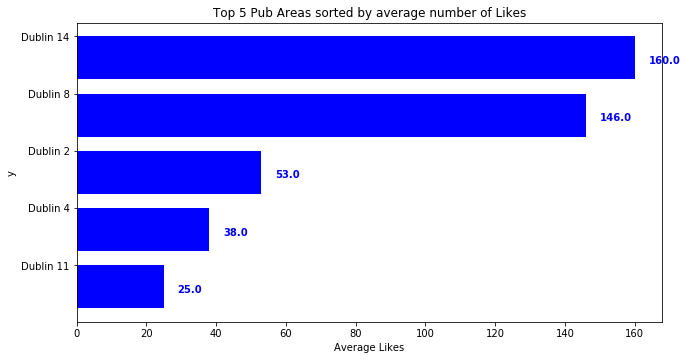

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

Top5Pub = df_PubGrouped.head() 
Top5Pub = Top5Pub.sort_values(['Likes'], ascending = True)
x = Top5Pub.index
y = Top5Pub.Likes.round()

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Top 5 Pub Areas sorted by average number of Likes')
plt.xlabel('Average Likes')
plt.ylabel('y')      
fig.set_size_inches(10.5, 5.5, forward=True)
for i, v in enumerate(y):
    ax.text(v + 4, i - .1, str(v), color='blue', fontweight='bold')
plt.show()

#plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') 

In [17]:
df_top10

,name,neighborhood,categories,distance,lat,lng,id,Likes
202,The Brazen Head,Dublin 8,Irish Pub,2974,53.344982,-6.276335,4ade0eedf964a520747021e3,787
222,The Bernard Shaw,Dublin 14,Pub,3702,53.331712,-6.264264,4ade0f0cf964a520f07021e3,450
122,O'Donoghue's,Dublin 2,Pub,118,53.338314,-6.254162,4ade0eeff964a5207e7021e3,318
148,Kehoe's,Dublin 4,Pub,2610,53.341143,-6.259437,4bd42c04046076b027707771,236
221,The Barge,Dublin 14,Pub,3548,53.330493,-6.260525,4b044d87f964a5201b5322e3,176
98,Toners Pub,Dublin 2,Pub,124,53.337838,-6.252410,4b05d950f964a52056e422e3,151
26,Arthur's Pub,Dublin 1,Pub,1926,53.343260,-6.281174,4d81270ddbc5f04dc25405b7,145
1,Doyles Pub,Dublin 1,Pub,754,53.345726,-6.257483,4bb7b2f9b35776b00308c801,95
147,Slattery's,Dublin 4,Pub,1174,53.337183,-6.234549,4b52519df964a520f37627e3,86
88,John Kavanagh's The Gravediggers,Dublin 11,Pub,2345,53.369486,-6.272062,4ade0ef5f964a520947021e3,63


### Plotting the top 10 pubs with the no of likes onto Folium map

In [28]:
# create map and display it
latitude = 53.3497645 
longitude = -6.2602732
from folium.features import DivIcon

Pub_map = folium.Map(location=[latitude, longitude], zoom_start=13)

for index, row in df_top10.iterrows():
    folium.CircleMarker(
        [row['lat'], row['lng']],
        radius= 25,
        fill = True,
        color='orange',
        fill_opacity=0.3
    ).add_to(Pub_map)
    
for index, row in df_top10.iterrows():
    folium.Marker(
        location = [row['lat'], row['lng']],icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(7,20),
        html=f"""<div style="font-size: 14pt; color: {'black'};">{row['Likes']}</div>"""),
    ).add_to(Pub_map)
Pub_map
